<a href="https://colab.research.google.com/drive/1knpOrXxq1iyu-Gj8F2-YsjDF54nVHU68?ts=62739507"
target="_parent">
<img src="https://colab.research.google.com/assets/colab-badge.svg"
alt="Open In Colab"/>
</a>

# Advanced Regression Predict on The Load ShortFall for Spain from 2015 - 2018

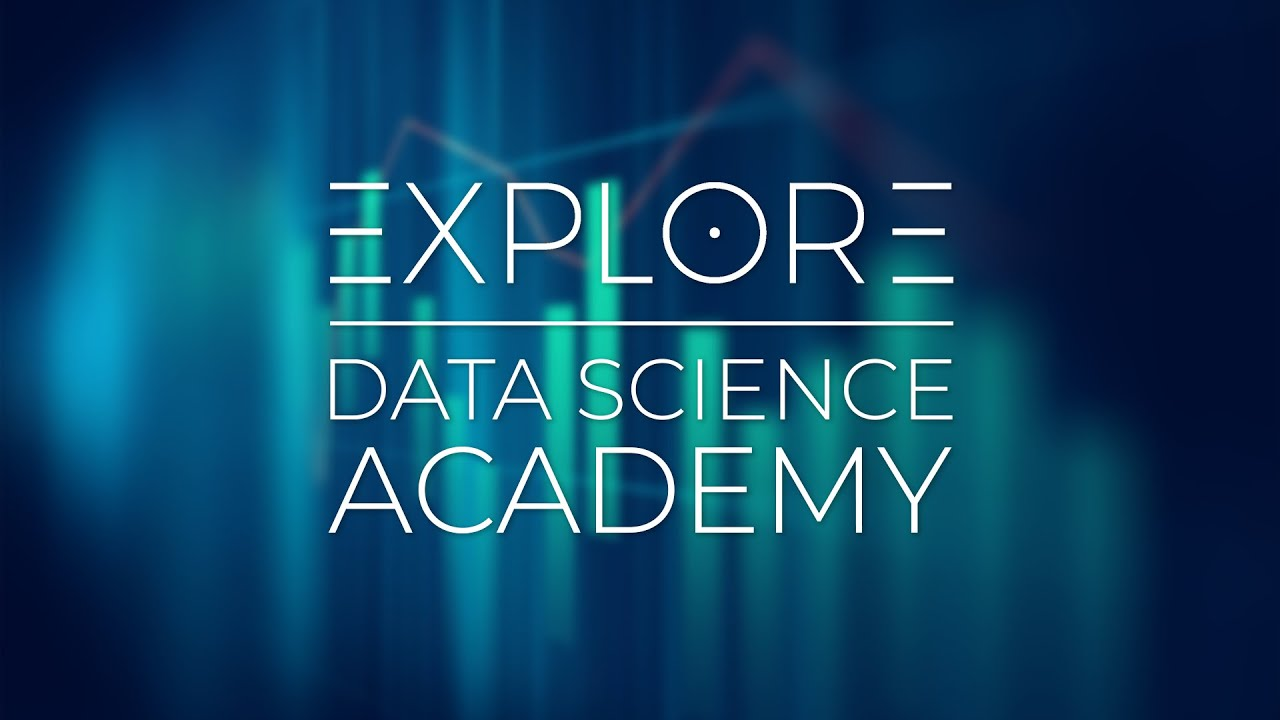

<h1 align="center">Created by</h1>

<h1 align="center">TEAM 25 / NM7</h1>

<h2 align="center">Supervised by Nomfundo Manyisa</h2>

---
---
<a id="cont"></a>

## Table of Contents
---
---

<a href=#one>1. Team Members</a>

<a href=#two>2. Predict Overview</a>

<a href=#three>3. Introduction</a>

<a href=#four>4. Problem Statement</a>

<a href=#five>5. Aims & Objectives</a>

<a href=#six>6. Literature Review</a>

<a href=#seven>7. Importing Packages</a>

<a href=#eight>8. Loading Data</a>

<a href=#nine>9. Exploratory Data Analysis (EDA)</a>

<a href=#ten>10. Data Engineering</a>

<a href=#eleven>11. Modeling</a>

<a href=#twelve>12. Model Performance/Evaluation</a>

<a href=#thirteen>13. Model Explanation</a>

<a id="one"></a>
## 1. Team Members
<a href=#cont>Back to Table of Contents</a>


---
#### Kelvin Mwaniki --- Team Lead
#### Shadrack Darku
#### Hudson Maina
#### Samuel Gyimah
#### Macmatthew Ahaotu
---

<a id="two"></a>
## 2. Predict Overview
<a href=#cont>Back to Table of Contents</a>

The government of Spain is considering an expansion of it's renewable energy resource infrastructure investments. As such, they require information on the trends and patterns of the countries renewable sources and fossil fuel energy generation. Your company has been awarded the contract to:

- 1. analyse the supplied data;
- 2. identify potential errors in the data and clean the existing data set;
- 3. determine if additional features can be added to enrich the data set;
- 4. build a model that is capable of forecasting the three hourly demand shortfalls;
- 5. evaluate the accuracy of the best machine learning model;
- 6. determine what features were most important in the model’s prediction decision, and
- 7. explain the inner working of the model to a non-technical audience.

<a id="three"></a>
## 3. Introduction
<a href=#cont>Back to Table of Contents</a>

The rapid rise in population and demand for a continuous power supply has  prompted the utilisation of fossil fuels in  many countries. Owing to this, the growth in the global economy requires more power demand and the failure of the utilities to  meet the power consumption of various consumers has a negative impact onthe  gross  domestic  product  (GDP).  This  shows  that  the world economy depends mainly on the availability of power supply. Presently, 75.5%  of global  electricity is sourced from fossil fuels while 24.5% comes  from  renewable energy resources  (RERs). This record  indicates over-dependence  of the  global population  on non-replenishable  sources  of  power generation. Moreover, conventional power generation is  expensive  to  run due to extremely high operating and maintenance (O&M) costs and serious health complications that are  associated with  its operation.The key  approach to meet  the universal energy sustainability is  to encourage the usage of RERs. This objective can be achieved if the stakeholders in the power sector can utilise the available RERs as aprerequisite to meet consumers’ power demand.

<a id="four"></a>
## 4. Problem Statement 
<a href=#cont>Back to Table of Contents</a>

In this project we were tasked to model the shortfall between the energy generated by means of fossil fuels and various renewable sources - for the country of Spain. The daily shortfall, which will be referred to as the target variable, will be modelled as a function of various city-specific weather features such as `pressure`, `wind speed`, `humidity`, etc. As with all data science projects, the provided features are rarely adequate predictors of the target variable. As such, we were required to perform feature engineering to ensure that we were able to accurately model Spain's three hourly shortfalls.

<a id="five"></a>
## 5. Aims & Objectives
<a href=#cont>Back to Table of Contents</a>

### Aims
- The aim of the Predict is to accurately model Spain's three hourly shortfalls using the provided features.

### Specific Objectives
- Explanatory Data Analysis of the dataset provided.
- Data Preprocessing and Feature Engineering.
- Applying of different Regression models.
- Model Evaluaion and Explanation.


<a id="six"></a>
## 6. Literature Review
<a href=#cont>Back to Table of Contents</a>

***Shortfall Energy*** means an amount calculated as the difference between the planned firm energy amounts from a resource in an identified period and a smaller amount of energy actually produced by that resource in the same identified period.

### The Difference Between Renewable Energy and Fossil Fuels
The difference between the two isn’t as complicated as you may think. Renewable energy comes from natural resources that can be replenished during an average human lifetime and includes the following types of power:

- Solar
- Wind
- Hydro
- Geothermal
- Biomass

Fossil fuels, on the other hand, can take thousands—or even millions—of years to naturally replenish:

- Natural gas
- Coal
- Oil

These distinctions may seem cut-and-dried, but there are some gray areas. Natural gas is often labeled as “clean power” because it burns cleaner than coal. Folks may even believe that natural gas is a sustainable resource. Don’t be fooled. natural gas is a fossil fuel that emits CO2 when burned. In the case of biomass, things also get a bit more complicated. Burning wood—the most common method of biomass energy generation—sometimes emits more CO2 than burning coal. That said, wood is classified as a renewable resource by a lot of scientists because trees can be replenished.

### Relationships Between the Features and the Shortfall in Load
The provided features given for the predict includes temperature, windspeed, humidity, rain, cloud, time, e.t.c. Looking at the the nature of the renewable resource this features can pose a large obstacle to power supply, for example in the case of wind a low wind speed could lead to a shortfall in wind based power supply, also clouds can affect the solar radiation gotten from the sun by solar cells. Thus this predict seeks to uncover this relationships to help future investors make proper choices in the sitings and deployments of this renewables.

<a id="seven"></a>
## 7. Importing Packages
<a href=#cont>Back to Table of Contents</a>

In [156]:
# Libraries for data loading, data manipulation and data visulisation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Libraries for data preparation and model building
import math
from scipy.stats import pearsonr
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import VarianceThreshold
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from xgboost.sklearn import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor, VotingRegressor, StackingRegressor, BaggingRegressor, AdaBoostRegressor
from sklearn import linear_model
from sklearn.svm import SVR
from fast_ml.feature_engineering import FeatureEngineering_DateTime
import sys
sys.path.append("kuma_utils/")
from kuma_utils.preprocessing.imputer import LGBMImputer
# Setting global constants to ensure notebook results are reproducible
plt.rcParams['figure.figsize'] = (12,6)  


<a id="eight"></a>
## 8. Loading Data
<a href=#cont>Back to Table of Contents</a>

In [4]:
# Loading the test data set.
Test = pd.read_csv('df_test.csv')

# Loading the Train data set.
Train = pd.read_csv('df_train.csv')

<a id="nine"></a>
## 9. Exploratory Data Analysis (EDA)
<a href=#cont>Back to Table of Contents</a>

## DATA CLEANING

### EVALUATING DATA SRTUCTURE

#### TRAIN DATASET

In [5]:
# The train dataset has 48 features with 8763 row entries.
Train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 49 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            8763 non-null   int64  
 1   time                  8763 non-null   object 
 2   Madrid_wind_speed     8763 non-null   float64
 3   Valencia_wind_deg     8763 non-null   object 
 4   Bilbao_rain_1h        8763 non-null   float64
 5   Valencia_wind_speed   8763 non-null   float64
 6   Seville_humidity      8763 non-null   float64
 7   Madrid_humidity       8763 non-null   float64
 8   Bilbao_clouds_all     8763 non-null   float64
 9   Bilbao_wind_speed     8763 non-null   float64
 10  Seville_clouds_all    8763 non-null   float64
 11  Bilbao_wind_deg       8763 non-null   float64
 12  Barcelona_wind_speed  8763 non-null   float64
 13  Barcelona_wind_deg    8763 non-null   float64
 14  Madrid_clouds_all     8763 non-null   float64
 15  Seville_wind_speed   

In [6]:
# The train dataset has 2068 missing values all withihn the Valencia_pressure feature.
Train.isnull().sum()

Unnamed: 0                 0
time                       0
Madrid_wind_speed          0
Valencia_wind_deg          0
Bilbao_rain_1h             0
Valencia_wind_speed        0
Seville_humidity           0
Madrid_humidity            0
Bilbao_clouds_all          0
Bilbao_wind_speed          0
Seville_clouds_all         0
Bilbao_wind_deg            0
Barcelona_wind_speed       0
Barcelona_wind_deg         0
Madrid_clouds_all          0
Seville_wind_speed         0
Barcelona_rain_1h          0
Seville_pressure           0
Seville_rain_1h            0
Bilbao_snow_3h             0
Barcelona_pressure         0
Seville_rain_3h            0
Madrid_rain_1h             0
Barcelona_rain_3h          0
Valencia_snow_3h           0
Madrid_weather_id          0
Barcelona_weather_id       0
Bilbao_pressure            0
Seville_weather_id         0
Valencia_pressure       2068
Seville_temp_max           0
Madrid_pressure            0
Valencia_temp_max          0
Valencia_temp              0
Bilbao_weather

#### TEST DATASET

In [7]:
# The test dataset has 47 features with 2920 row entries.
Test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2920 entries, 0 to 2919
Data columns (total 48 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            2920 non-null   int64  
 1   time                  2920 non-null   object 
 2   Madrid_wind_speed     2920 non-null   float64
 3   Valencia_wind_deg     2920 non-null   object 
 4   Bilbao_rain_1h        2920 non-null   float64
 5   Valencia_wind_speed   2920 non-null   float64
 6   Seville_humidity      2920 non-null   float64
 7   Madrid_humidity       2920 non-null   float64
 8   Bilbao_clouds_all     2920 non-null   float64
 9   Bilbao_wind_speed     2920 non-null   float64
 10  Seville_clouds_all    2920 non-null   float64
 11  Bilbao_wind_deg       2920 non-null   float64
 12  Barcelona_wind_speed  2920 non-null   float64
 13  Barcelona_wind_deg    2920 non-null   float64
 14  Madrid_clouds_all     2920 non-null   float64
 15  Seville_wind_speed   

In [8]:
# The test dataset has 454 missing entries all within in the Valencia_pressure feature.
Test.isnull().sum()

Unnamed: 0                0
time                      0
Madrid_wind_speed         0
Valencia_wind_deg         0
Bilbao_rain_1h            0
Valencia_wind_speed       0
Seville_humidity          0
Madrid_humidity           0
Bilbao_clouds_all         0
Bilbao_wind_speed         0
Seville_clouds_all        0
Bilbao_wind_deg           0
Barcelona_wind_speed      0
Barcelona_wind_deg        0
Madrid_clouds_all         0
Seville_wind_speed        0
Barcelona_rain_1h         0
Seville_pressure          0
Seville_rain_1h           0
Bilbao_snow_3h            0
Barcelona_pressure        0
Seville_rain_3h           0
Madrid_rain_1h            0
Barcelona_rain_3h         0
Valencia_snow_3h          0
Madrid_weather_id         0
Barcelona_weather_id      0
Bilbao_pressure           0
Seville_weather_id        0
Valencia_pressure       454
Seville_temp_max          0
Madrid_pressure           0
Valencia_temp_max         0
Valencia_temp             0
Bilbao_weather_id         0
Seville_temp        

### I  FILLING MISSING VALUES

### USING INTERPOLATION 

#### TRAIN DATASET

In [9]:
# Code replaces the missing values in the Valencia_pressure feature with an interpolated estimation. 
Train_INTPL2 = Train.interpolate(method ='linear', inplace = False)
Train_INTPL2.isnull().sum()

Unnamed: 0              0
time                    0
Madrid_wind_speed       0
Valencia_wind_deg       0
Bilbao_rain_1h          0
Valencia_wind_speed     0
Seville_humidity        0
Madrid_humidity         0
Bilbao_clouds_all       0
Bilbao_wind_speed       0
Seville_clouds_all      0
Bilbao_wind_deg         0
Barcelona_wind_speed    0
Barcelona_wind_deg      0
Madrid_clouds_all       0
Seville_wind_speed      0
Barcelona_rain_1h       0
Seville_pressure        0
Seville_rain_1h         0
Bilbao_snow_3h          0
Barcelona_pressure      0
Seville_rain_3h         0
Madrid_rain_1h          0
Barcelona_rain_3h       0
Valencia_snow_3h        0
Madrid_weather_id       0
Barcelona_weather_id    0
Bilbao_pressure         0
Seville_weather_id      0
Valencia_pressure       0
Seville_temp_max        0
Madrid_pressure         0
Valencia_temp_max       0
Valencia_temp           0
Bilbao_weather_id       0
Seville_temp            0
Valencia_humidity       0
Valencia_temp_min       0
Barcelona_te

#### Test Dataset

In [11]:
# Code replaces the missing values in the Valencia_pressure feature with an interpolated estimation
# Leaving 29 unreplaced values.
Test_INTPL = Test.interpolate(method = 'linear')
Test_INTPL.isnull().sum()

Unnamed: 0               0
time                     0
Madrid_wind_speed        0
Valencia_wind_deg        0
Bilbao_rain_1h           0
Valencia_wind_speed      0
Seville_humidity         0
Madrid_humidity          0
Bilbao_clouds_all        0
Bilbao_wind_speed        0
Seville_clouds_all       0
Bilbao_wind_deg          0
Barcelona_wind_speed     0
Barcelona_wind_deg       0
Madrid_clouds_all        0
Seville_wind_speed       0
Barcelona_rain_1h        0
Seville_pressure         0
Seville_rain_1h          0
Bilbao_snow_3h           0
Barcelona_pressure       0
Seville_rain_3h          0
Madrid_rain_1h           0
Barcelona_rain_3h        0
Valencia_snow_3h         0
Madrid_weather_id        0
Barcelona_weather_id     0
Bilbao_pressure          0
Seville_weather_id       0
Valencia_pressure       29
Seville_temp_max         0
Madrid_pressure          0
Valencia_temp_max        0
Valencia_temp            0
Bilbao_weather_id        0
Seville_temp             0
Valencia_humidity        0
V

In [12]:
# Code replaced the 29 null values with the mean of the interpolated Valencia_pressure feature.
Test_INTPL2 = Test_INTPL.fillna(value = {'Valencia_pressure':Test_INTPL['Valencia_pressure'].mean() }, inplace = False)
Test_INTPL2.isnull().sum()

Unnamed: 0              0
time                    0
Madrid_wind_speed       0
Valencia_wind_deg       0
Bilbao_rain_1h          0
Valencia_wind_speed     0
Seville_humidity        0
Madrid_humidity         0
Bilbao_clouds_all       0
Bilbao_wind_speed       0
Seville_clouds_all      0
Bilbao_wind_deg         0
Barcelona_wind_speed    0
Barcelona_wind_deg      0
Madrid_clouds_all       0
Seville_wind_speed      0
Barcelona_rain_1h       0
Seville_pressure        0
Seville_rain_1h         0
Bilbao_snow_3h          0
Barcelona_pressure      0
Seville_rain_3h         0
Madrid_rain_1h          0
Barcelona_rain_3h       0
Valencia_snow_3h        0
Madrid_weather_id       0
Barcelona_weather_id    0
Bilbao_pressure         0
Seville_weather_id      0
Valencia_pressure       0
Seville_temp_max        0
Madrid_pressure         0
Valencia_temp_max       0
Valencia_temp           0
Bilbao_weather_id       0
Seville_temp            0
Valencia_humidity       0
Valencia_temp_min       0
Barcelona_te

### II  CORRECTING OUTLIERS

#### MEASURING KURTOSIS 

#### Train Dataset

In [14]:
# Code shows the presence of outliers in 14 features of the train dataset. 
Train_INTPL2.kurtosis()

Unnamed: 0                -1.200000
Madrid_wind_speed          2.036462
Bilbao_rain_1h            32.904656
Valencia_wind_speed       35.645426
Seville_humidity          -1.017983
Madrid_humidity           -1.167537
Bilbao_clouds_all         -1.533417
Bilbao_wind_speed          3.631565
Seville_clouds_all         2.155921
Bilbao_wind_deg           -1.083530
Barcelona_wind_speed       1.493635
Barcelona_wind_deg        -0.959160
Madrid_clouds_all          0.142079
Seville_wind_speed         1.398580
Barcelona_rain_1h        101.578931
Seville_rain_1h           93.840746
Bilbao_snow_3h           806.128471
Barcelona_pressure      3687.564230
Seville_rain_3h          413.136592
Madrid_rain_1h            76.584491
Barcelona_rain_3h        187.800460
Valencia_snow_3h        4089.323165
Madrid_weather_id          9.259047
Barcelona_weather_id       5.701882
Bilbao_pressure            1.825323
Seville_weather_id        10.710308
Valencia_pressure          3.063461
Seville_temp_max          -0

In [16]:
Train_INTPL2.nlargest(n = 5, columns = ['Bilbao_rain_1h','Valencia_wind_speed','Bilbao_wind_speed',
                                       'Barcelona_rain_1h','Seville_rain_1h','Bilbao_snow_3h',
                                       'Barcelona_pressure','Seville_rain_3h','Madrid_rain_1h','Barcelona_rain_3h',
                                       'Valencia_snow_3h','Madrid_weather_id','Barcelona_weather_id','Seville_weather_id'
                                       ,'Valencia_pressure'] )

,Unnamed: 0,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
232,232,2015-01-30 09:00:00,7.333333,level_10,3.0,37.666667,90.666667,86.000000,92.0,5.000000,...,283.700000,283.156667,280.837385,280.837385,283.156667,280.837385,287.125000,283.700000,283.700000,2952.000000
234,234,2015-01-30 15:00:00,8.333333,level_8,3.0,35.333333,81.333333,71.333333,92.0,4.000000,...,286.303500,284.900000,281.629281,281.629281,284.900000,281.629281,289.602000,286.303500,286.303500,5436.000000
235,235,2015-01-30 18:00:00,8.000000,level_8,3.0,26.666667,79.666667,84.333333,92.0,4.333333,...,284.876667,285.164667,281.950385,281.950385,285.164667,281.950385,289.206333,284.876667,284.876667,5060.000000
233,233,2015-01-30 12:00:00,8.333333,level_10,3.0,22.000000,84.666667,76.666667,92.0,4.333333,...,285.877000,284.933333,281.209510,281.209510,284.933333,281.209510,288.927000,285.877000,285.877000,6193.000000
236,236,2015-01-30 21:00:00,8.000000,level_9,3.0,17.666667,83.000000,93.000000,92.0,5.333333,...,284.070500,283.450000,281.806177,281.806177,283.450000,281.806177,288.558000,284.070500,284.070500,7155.333333


#### CLAMP TRANSFORMATION [CONFIDENCE INTERVAL CLIPPING]

'''
Assuming a confidence interval of 98% the code in this section clips values that exceed the 99% of expected
outputs in the upper confidence interval level of every feature and the 1% of values that below the lower
confidence interval of the same. This helps dampen the effects of the ontline data while maintaining the integrity 
of the collected data.
'''

In [22]:
# Function returns the upper limit for a given confidence interval.
def Upper_CIL(Dset,Feature,z):
    upper = Dset[Feature].mean() + z*(Dset[Feature].std()/math.sqrt(len(Dset[Feature])))
    return upper

In [23]:
# Function returns the upper limit for a given confidence interval.
def Lower_CIL(Dset,Feature,z):
    upper = Dset[Feature].mean() - z*(Dset[Feature].std()/math.sqrt(len(Dset[Feature])))
    return upper

In [24]:
# Bilbao_rain_1h upper confidence interval level - 99% confidence
Upper_CIL(Train_INTPL2,'Bilbao_rain_1h',2.58)

0.14608519426622998

In [25]:
# Bilbao_rain_1h lower confidence interval level - 99% confidence
Lower_CIL(Train_INTPL2,'Bilbao_rain_1h',2.58)

0.12541999801951473

In [26]:
# Code clips the outliers at the upper and lower 99% confidence level
Train_INTPL2['Bilbao_rain_1h'].clip(lower = 0.12541999801951473, upper = 0.14608519426622998, inplace = True)

In [27]:
# Valencia_wind_speed upper confidence interval level - 99% confidence
Upper_CIL(Train_INTPL2,'Valencia_wind_speed',2.58)

2.652726371641194

In [28]:
# Valencia_wind_speed lower confidence interval level - 99% confidence
Lower_CIL(Train_INTPL2,'Valencia_wind_speed',2.58)

2.5198172777947234

In [29]:
# Code clips the outliers at the upper and lower 99% confidence level
Train_INTPL2['Valencia_wind_speed'].clip(lower = 2.5198172777947234, upper = 2.652726371641194, inplace = True)

In [30]:
# Bilbao_wind_speed upper confidence interval level - 99% confidence
Upper_CIL(Train_INTPL2,'Bilbao_wind_speed',2.58)

1.8970958454270719

In [31]:
# Bilbao_wind_speed lower confidence interval level - 99% confidence
Lower_CIL(Train_INTPL2,'Bilbao_wind_speed',2.58)

1.8036154787013563

In [32]:
# Code clips the outliers at the upper and lower 99% confidence level
Train_INTPL2['Bilbao_wind_speed'].clip(lower = 1.8036154787013563, upper = 1.8970958454270719, inplace = True)

In [33]:
# Barcelona_rain_1h_speed upper confidence interval level - 99% confidence
Upper_CIL(Train_INTPL2,'Barcelona_rain_1h',2.58)

0.14639933878333536

In [34]:
# Barcelona_rain_1h lower confidence interval level - 99% confidence
Lower_CIL(Train_INTPL2,'Barcelona_rain_1h',2.58)

0.11141191307105194

In [35]:
# Code clips the outliers at the upper and lower 99% confidence level
Train_INTPL2['Barcelona_rain_1h'].clip(lower = 0.11141191307105194, upper = 0.14639933878333536, inplace = True)

In [36]:
# Seville_rain_1h upper confidence interval level - 99% confidence
Upper_CIL(Train_INTPL2,'Seville_rain_1h',2.58)

0.044285317331464395

In [37]:
# Seville_rain_1h lower confidence interval level - 99% confidence
Lower_CIL(Train_INTPL2,'Seville_rain_1h',2.58)

0.034591779553164385

In [38]:
# Code clips the outliers at the upper and lower 99% confidence level
Train_INTPL2['Seville_rain_1h'].clip(lower =0.034591779553164385, upper = 0.044285317331464395, inplace = True)

In [39]:
# Bilbao_snow_3h upper confidence interval level - 99% confidence
Upper_CIL(Train_INTPL2,'Bilbao_snow_3h',2.58)

0.04727076127711005

In [40]:
# Bilbao_snow_3h lower confidence interval level - 99% confidence
Lower_CIL(Train_INTPL2,'Bilbao_snow_3h',2.58)

0.016553347665809043

In [41]:
# Code clips the outliers at the upper and lower 99% confidence level
Train_INTPL2['Bilbao_snow_3h'].clip(lower =0.016553347665809043, upper = 0.04727076127711005, inplace = True)

In [42]:
# Barcelona_pressure upper confidence interval level - 99% confidence
Upper_CIL(Train_INTPL2,'Barcelona_pressure',2.58)

1765.8329514428349

In [43]:
# Barcelona_pressure lower confidence interval level - 99% confidence
Lower_CIL(Train_INTPL2,'Barcelona_pressure',2.58)

990.0962584928641

In [44]:
# Code clips the outliers at the upper and lower 99% confidence level
Train_INTPL2['Barcelona_pressure'].clip(lower =990.0962584928641, upper = 1765.8329514428349, inplace = True)

In [45]:
# Seville_rain_3h upper confidence interval level - 99% confidence
Upper_CIL(Train_INTPL2,'Seville_rain_3h',2.58)

0.00034339595778507155

In [46]:
# Seville_rain_3h lower confidence interval level - 99% confidence
Lower_CIL(Train_INTPL2,'Seville_rain_3h',2.58)

0.00014167384319632755

In [47]:
# Code clips the outliers at the upper and lower 99% confidence level
Train_INTPL2['Seville_rain_3h'].clip(lower =0.00014167384319632755, upper = 0.00034339595778507155, inplace = True)

In [48]:
# Madrid_rain_1h upper confidence interval level - 99% confidence
Upper_CIL(Train_INTPL2,'Madrid_rain_1h',2.58)

0.04202495772257894

In [49]:
# Madrid_rain_1h lower confidence interval level - 99% confidence
Lower_CIL(Train_INTPL2,'Madrid_rain_1h',2.58)

0.033611239926628206

In [50]:
# Code clips the outliers at the upper and lower 99% confidence level
Train_INTPL2['Madrid_rain_1h'].clip(lower =0.033611239926628206, upper = 0.04202495772257894, inplace = True)

In [51]:
# Barcelona_rain_3h upper confidence interval level - 99% confidence
Upper_CIL(Train_INTPL2,'Barcelona_rain_3h',2.58)

0.00054958665191455

In [52]:
# Barcelona_rain_3h lower confidence interval level - 99% confidence
Lower_CIL(Train_INTPL2,'Barcelona_rain_3h',2.58)

0.0003294121689458856

In [53]:
# Code clips the outliers at the upper and lower 99% confidence level
Train_INTPL2['Barcelona_rain_3h'].clip(lower =0.0003294121689458856, upper = 0.00054958665191455, inplace = True)

In [54]:
# Valencia_snow_3h upper confidence interval level - 99% confidence
Upper_CIL(Train_INTPL2,'Valencia_snow_3h',2.58)

0.0005324402196676315

In [55]:
# Valencia_snow_3h lower confidence interval level - 99% confidence
Lower_CIL(Train_INTPL2,'Valencia_snow_3h',2.58)

-0.00012162200672685784

In [56]:
# Code clips the outliers at the upper and lower 99% confidence level
Train_INTPL2['Valencia_snow_3h'].clip(lower = -0.00012162200672685784, upper = 0.0005324402196676315, inplace = True)

In [57]:
# Madrid_weather_id upper confidence interval level - 99% confidence
Upper_CIL(Train_INTPL2,'Madrid_weather_id',2.58)

775.6584179911389

In [58]:
# Madrid_weather_id lower confidence interval level - 99% confidence
Lower_CIL(Train_INTPL2,'Madrid_weather_id',2.58)

771.396769856752

In [59]:
# Code clips the outliers at the upper and lower 99% confidence level
Train_INTPL2['Madrid_weather_id'].clip(lower = 771.396769856752, upper = 775.6584179911389, inplace = True)

In [60]:
# Barcelona_weather_id upper confidence interval level - 99% confidence
Upper_CIL(Train_INTPL2,'Barcelona_weather_id',2.58)

768.4089661055516

In [61]:
# Barcelona_weather_id lower confidence interval level - 99% confidence
Lower_CIL(Train_INTPL2,'Barcelona_weather_id',2.58)

763.5504085378291

In [62]:
# Code clips the outliers at the upper and lower 99% confidence level
Train_INTPL2['Barcelona_weather_id'].clip(lower = 763.5504085378291, upper = 768.4089661055516, inplace = True)

In [63]:
# Seville_weather_id upper confidence interval level - 99% confidence
Upper_CIL(Train_INTPL2,'Seville_weather_id',2.58)

776.6415489618001

In [64]:
# Seville_weather_id lower confidence interval level - 99% confidence
Lower_CIL(Train_INTPL2,'Seville_weather_id',2.58)

772.6760870583327

In [65]:
# Code clips the outliers at the upper and lower 99% confidence level
Train_INTPL2['Seville_weather_id'].clip(lower = 772.6760870583327, upper = 776.6415489618001, inplace = True)

In [66]:
# Valencia_pressure upper confidence interval level - 99% confidence
Upper_CIL(Train_INTPL2,'Valencia_pressure',2.58)

1014.0582448058219

In [67]:
# Valencia_pressure lower confidence interval level - 99% confidence
Lower_CIL(Train_INTPL2,'Valencia_pressure',2.58)

1013.5527331697665

In [68]:
# Code clips the outliers at the upper and lower 99% confidence level
Train_INTPL2['Valencia_pressure'].clip(lower = 1013.5527331697665, upper = 1014.0582448058219, inplace = True)

#### CHECKING EFFECT OF CLAMP TRANSFORMATION

In [69]:
# Using the clamp transform method the degree of outliers has been greatly reduced but still is still present.
Train_INTPL2.kurtosis()

Unnamed: 0                -1.200000
Madrid_wind_speed          2.036462
Bilbao_rain_1h            -0.292013
Valencia_wind_speed       -1.740790
Seville_humidity          -1.017983
Madrid_humidity           -1.167537
Bilbao_clouds_all         -1.533417
Bilbao_wind_speed         -1.676779
Seville_clouds_all         2.155921
Bilbao_wind_deg           -1.083530
Barcelona_wind_speed       1.493635
Barcelona_wind_deg        -0.959160
Madrid_clouds_all          0.142079
Seville_wind_speed         1.398580
Barcelona_rain_1h          4.273046
Seville_rain_1h            5.372852
Bilbao_snow_3h            92.250467
Barcelona_pressure       439.549275
Seville_rain_3h           92.450676
Madrid_rain_1h             4.564620
Barcelona_rain_3h         34.697714
Valencia_snow_3h        1748.598813
Madrid_weather_id          2.250095
Barcelona_weather_id       1.324866
Bilbao_pressure            1.825323
Seville_weather_id         1.224693
Valencia_pressure         -1.381910
Seville_temp_max          -0


###  FEATURE ENGINEERING

#### REMOVAL OF ALPHABETICAL FROM FEATURES

In [79]:
# Valencia_wind_deg before feature engineering
Train_INTPL2['Valencia_wind_deg'].head(5)

0     5
1    10
2     9
3     8
4     7
Name: Valencia_wind_deg, dtype: object

In [80]:
Train_INTPL2['Valencia_wind_deg'] = Train_INTPL2['Valencia_wind_deg'].str.replace(r'[^0-9]', '')

In [81]:
# Valencia_wind_deg after feature engineering
Train_INTPL2['Valencia_wind_deg'].head(5)

0     5
1    10
2     9
3     8
4     7
Name: Valencia_wind_deg, dtype: object

In [82]:
Train_INTPL2['Seville_pressure'].head(5) 

0    sp25
1    sp25
2    sp25
3    sp25
4    sp25
Name: Seville_pressure, dtype: object

In [83]:
Train_INTPL2['Seville_pressure'] = Train_INTPL2['Seville_pressure'].str.replace(r'[^0-9]', '')

In [84]:
Train_INTPL2['Seville_pressure'].head(5) 

0    25
1    25
2    25
3    25
4    25
Name: Seville_pressure, dtype: object

#### VARIABLE SELECTION BY CORRELATION

In [70]:
corrs = Train_INTPL2.corr()['load_shortfall_3h'].sort_values(ascending=False)

In [71]:
# The code eliminates two variables: Bilbao_snow_3h and Barcelona_pressure by means of their P - Value being greater than 0.05.
dict_cp = {}

column_titles = [col for col in corrs.index if col!= 'load_shortfall_3h']
for col in column_titles:
    p_val = round(pearsonr(Train_INTPL2[col], Train_INTPL2['load_shortfall_3h'])[1],6)
    dict_cp[col] = {'Correlation_Coefficient':corrs[col],
                    'P_Value':p_val}
df_cp = pd.DataFrame(dict_cp).T
df_cp_sorted = df_cp.sort_values('P_Value')
df_cp_sorted[df_cp_sorted['P_Value']<0.2]

,Correlation_Coefficient,P_Value
Valencia_temp_min,0.201863,0.000000
Barcelona_weather_id,0.071281,0.000000
Seville_weather_id,0.069466,0.000000
Madrid_wind_speed,-0.150981,0.000000
Bilbao_wind_speed,-0.056618,0.000000
Barcelona_rain_1h,-0.070595,0.000000
Madrid_clouds_all,-0.081623,0.000000
Madrid_pressure,0.092638,0.000000
Valencia_wind_speed,-0.090587,0.000000
Barcelona_wind_speed,-0.103633,0.000000


#### VARIABLE SELCTION BY VARIANCE THRESHOLD

In [93]:
X_names = list(Train_INTPL2.columns)
X_names.remove('load_shortfall_3h')
X_names.remove('time')               # Due to differences in formatting 
X_names.remove('Bilbao_snow_3h')     # Due correlation P-Values > 0.05
X_names.remove('Barcelona_pressure') # Due correlation P-Values > 0.05
X_data = Train_INTPL2[X_names]
y_data = Train_INTPL2[ 'load_shortfall_3h']

In [94]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_data)
X_normalize = pd.DataFrame(X_scaled, columns=X_data.columns)

In [95]:
# Create VarianceThreshold object
selector = VarianceThreshold(threshold=0.03)

# Use the object to apply the threshold on data
selector.fit(X_normalize)

VarianceThreshold(threshold=0.03)

In [110]:
# Get column variances
column_variances = selector.variances_

vars_dict = {}
vars_dict = [{"Variable_Name": c_name, "Variance": c_var}
             for c_name, c_var in zip(X_normalize.columns, column_variances)]
df_vars = pd.DataFrame(vars_dict)
df_vars.sort_values(by='Variance', ascending=False)

,Variable_Name,Variance
4,Valencia_wind_speed,0.234768
8,Bilbao_wind_speed,0.231294
26,Valencia_pressure,0.212741
3,Bilbao_rain_1h,0.175209
23,Barcelona_weather_id,0.136347
25,Seville_weather_id,0.135602
22,Madrid_weather_id,0.121172
7,Bilbao_clouds_all,0.105945
2,Valencia_wind_deg,0.102221
15,Barcelona_rain_1h,0.097372


In [111]:
# Select new columns
Train_New = X_normalize[X_normalize.columns[selector.get_support(indices=True)]]

# Save variable names for later
X_var_names = Train_New.columns

# View first few entries
Train_New.head()

,Unnamed: 0,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,...,Valencia_temp,Bilbao_weather_id,Seville_temp,Valencia_humidity,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Seville_temp_min,Madrid_temp,Madrid_temp_min
0,0.000000,0.444444,0.0,0.0,0.720000,0.615658,0.00,0.0,0.0,0.621521,...,0.000000,0.993296,0.051072,0.728625,0.211393,0.019286,0.279352,0.091896,0.019827,0.021028
1,0.000114,1.000000,0.0,0.0,0.763636,0.622776,0.00,0.0,0.0,0.615028,...,0.045397,0.993296,0.067158,0.676580,0.200628,0.028350,0.266986,0.107351,0.029145,0.030910
2,0.000228,0.888889,0.0,0.0,0.687273,0.619217,0.00,0.0,0.0,0.596475,...,0.200319,0.993296,0.156803,0.617100,0.225004,0.156067,0.294986,0.193478,0.160443,0.170162
3,0.000342,0.777778,0.0,0.0,0.621818,0.533808,0.00,0.0,0.0,0.555659,...,0.370302,0.993296,0.310647,0.486989,0.269139,0.341654,0.345683,0.341284,0.351233,0.372508
4,0.000457,0.666667,0.0,0.0,0.552727,0.540925,0.02,0.0,0.0,0.514842,...,0.323817,0.993296,0.313437,0.535316,0.287721,0.317073,0.367027,0.343964,0.325963,0.345707


#### CHECK FOR LINEARITY


#### CHECK MULTICOLINEARITY


#### CHECK FOR INDEPENDENCE


#### CHECK FOR HOMOSCEDASTICITY


#### CHECK FOR NORMALITY


#### CHECK FOR OUTLIERS IN RESIDUALS 


### SUMMARY STATISTICS

In [104]:
Train_New.describe()

,Unnamed: 0,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,...,Valencia_temp,Bilbao_weather_id,Seville_temp,Valencia_humidity,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Seville_temp_min,Madrid_temp,Madrid_temp_min
count,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,...,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000
mean,0.500000,0.475154,0.226521,0.376583,0.592641,0.545353,0.434691,0.363232,0.140905,0.442368,...,0.510726,0.867132,0.510698,0.612428,0.453355,0.496101,0.521611,0.480971,0.486731,0.489402
std,0.288725,0.319738,0.418604,0.484557,0.246777,0.259808,0.325510,0.480958,0.249375,0.284016,...,0.176678,0.194156,0.184580,0.214821,0.173482,0.197011,0.178852,0.183094,0.194118,0.202781
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.250000,0.222222,0.000000,0.000000,0.392727,0.320285,0.100000,0.000000,0.000000,0.204082,...,0.376480,0.826257,0.377966,0.457249,0.318016,0.346801,0.387857,0.350746,0.341037,0.337353
50%,0.500000,0.444444,0.000000,0.000000,0.625455,0.551601,0.450000,0.000000,0.000000,0.409091,...,0.500477,0.993296,0.495421,0.631970,0.429321,0.467330,0.509589,0.462687,0.458359,0.464758
75%,0.750000,0.777778,0.000000,1.000000,0.803636,0.772242,0.750000,1.000000,0.205479,0.651206,...,0.645524,0.996089,0.642158,0.791822,0.589243,0.643098,0.660064,0.604478,0.626611,0.636590
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


All features have a record count of 8763 with no recording of missing or untallying values between features

The feature with the highest mean recording are Bilbao_weather_id followed by valencia_humidity and Seville_humidity suggesting condusive geographic conditions for humidity and rainfal

The features with the highest standard deviation are Bilbao_wind_speed, Bilbao_clouds_all and valencia wind speed suggesting an active weather system in those areas.

In [106]:
Train_New.skew()

Unnamed: 0             -1.305627e-15
Valencia_wind_deg       8.835394e-02
Bilbao_rain_1h          1.306925e+00
Valencia_wind_speed     5.095166e-01
Seville_humidity       -3.101750e-01
Madrid_humidity        -5.737777e-02
Bilbao_clouds_all      -5.308540e-02
Bilbao_wind_speed       5.688621e-01
Seville_clouds_all      1.814452e+00
Bilbao_wind_deg         2.269265e-01
Barcelona_wind_deg     -1.800013e-01
Madrid_clouds_all       1.246745e+00
Barcelona_rain_1h       2.504410e+00
Seville_pressure       -8.602198e-02
Seville_rain_1h         2.715074e+00
Madrid_rain_1h          2.561948e+00
Madrid_weather_id      -2.061026e+00
Barcelona_weather_id   -1.822290e+00
Seville_weather_id     -1.787241e+00
Valencia_pressure      -7.775559e-01
Seville_temp_max       -3.393083e-02
Madrid_pressure        -1.850768e+00
Valencia_temp           5.747637e-02
Bilbao_weather_id      -1.234844e+00
Seville_temp            1.572383e-01
Valencia_humidity      -3.057573e-01
Barcelona_temp_max      2.769246e-01
M

It can be observed that most of the data is highly skewed.


This can be concluded as a result of being a collection of weather related data that is highly subject to seasonality.

The highest values of this is seen in Valencia_pressure, Madrid_humidity, Bilbao_wind_speed and Bilbao_clouds_all

### UNIVARIATE ANALYSIS

It can be observed that for features exhibiting two pronounced spikes are indicative of a bi-seasonal weather pattern while those exhibiting miltiple readings are indicative of a year round seasonal weather pattern with varrying degrees.

Barcelona_wind_deg, Seville_humidity and Madrid_humidity exhibit a fairly normal distribution of weather seasonality

Bilbao_clouds_all,Seville_clouds_all and Madrid_clouds_all exhibit a generally low season with seasonal high peaks of cloudyness during the rainy seasons/ seasons of high moisture.  

#### HISTOGRAM PLOTS

<AxesSubplot:xlabel='Bilbao_wind_speed', ylabel='Count'>

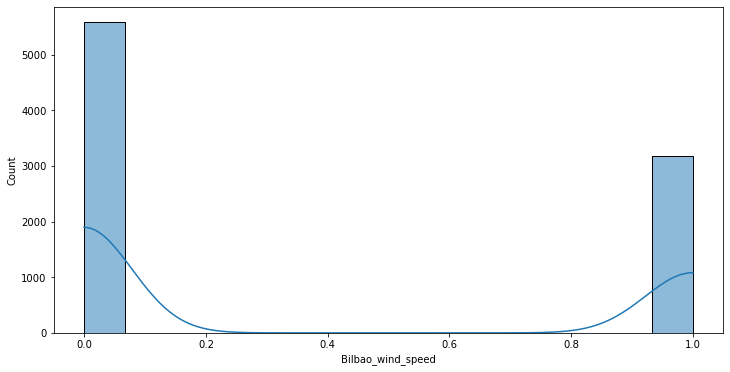

In [157]:
features = ['Bilbao_wind_speed','Valencia_wind_speed','Barcelona_wind_deg','Barcelona_weather_id','Seville_weather_id',
            'Barcelona_rain_1h','Bilbao_rain_1h','Valencia_pressure','Bilbao_clouds_all','Madrid_clouds_all',
            'Seville_clouds_all','Madrid_humidity','Seville_humidity']
#Train_New[features].hist(figsize=(15,10), bins = 50)
sns.histplot(data = Train_New['Bilbao_wind_speed'], kde = True)

<AxesSubplot:xlabel='Valencia_wind_speed', ylabel='Count'>

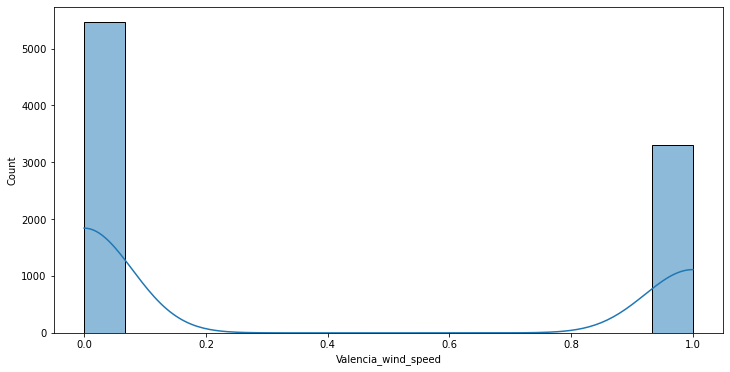

In [158]:
sns.histplot(data = Train_New['Valencia_wind_speed'], kde = True)

<AxesSubplot:xlabel='Barcelona_wind_deg', ylabel='Count'>

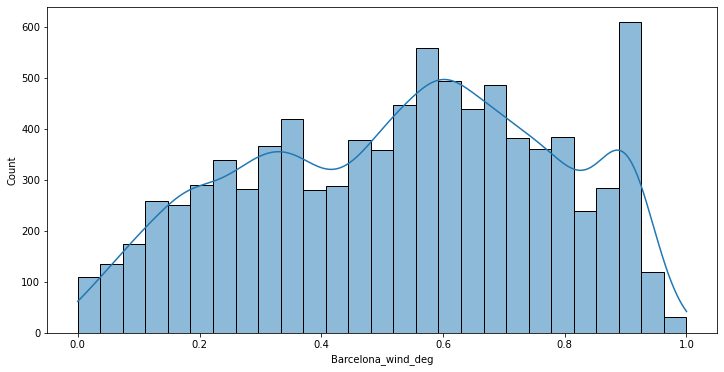

In [159]:
sns.histplot(data = Train_New['Barcelona_wind_deg'], kde = True)

<AxesSubplot:xlabel='Barcelona_weather_id', ylabel='Count'>

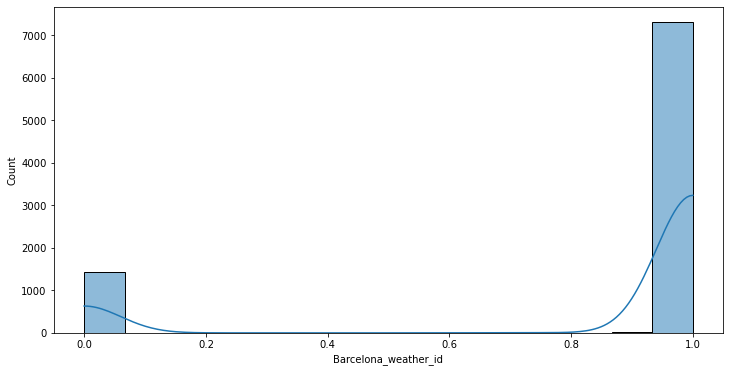

In [160]:
sns.histplot(data = Train_New['Barcelona_weather_id'], kde = True)

<AxesSubplot:xlabel='Seville_weather_id', ylabel='Count'>

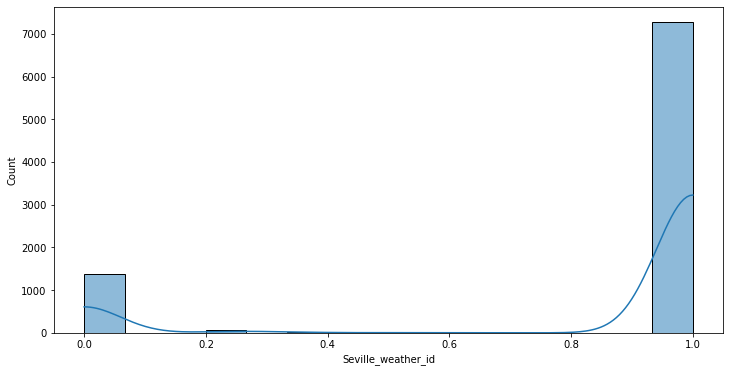

In [161]:
sns.histplot(data = Train_New['Seville_weather_id'], kde = True)

<AxesSubplot:xlabel='Barcelona_rain_1h', ylabel='Count'>

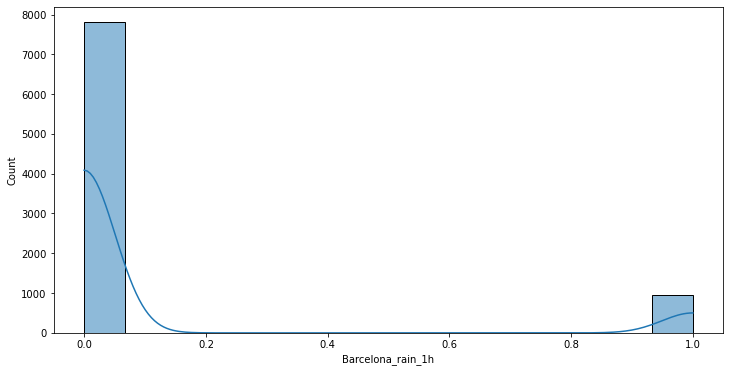

In [162]:
sns.histplot(data = Train_New['Barcelona_rain_1h'], kde = True)

<AxesSubplot:xlabel='Bilbao_rain_1h', ylabel='Count'>

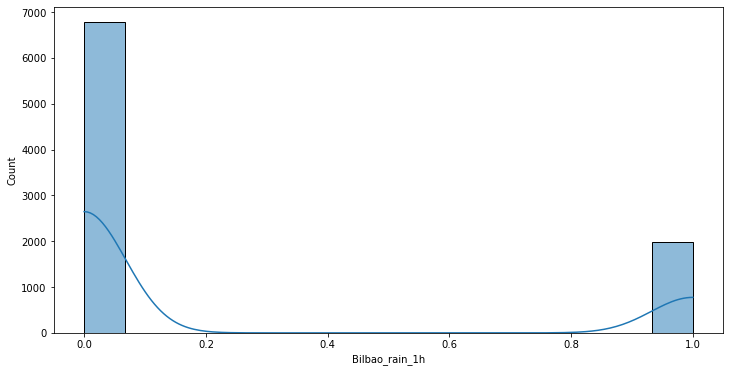

In [163]:
sns.histplot(data = Train_New['Bilbao_rain_1h'], kde = True)

<AxesSubplot:xlabel='Valencia_pressure', ylabel='Count'>

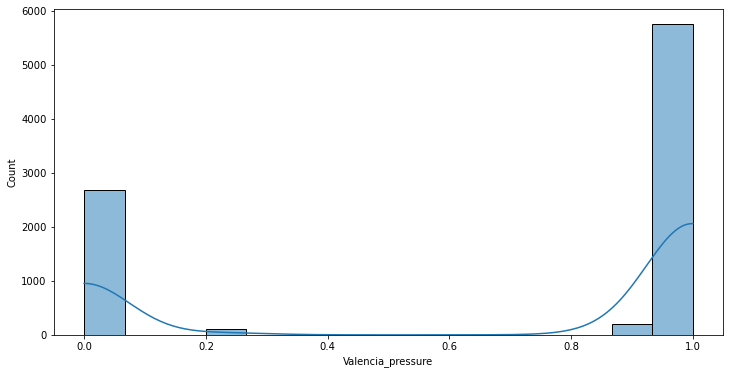

In [164]:
sns.histplot(data = Train_New['Valencia_pressure'], kde = True)

<AxesSubplot:xlabel='Bilbao_clouds_all', ylabel='Count'>

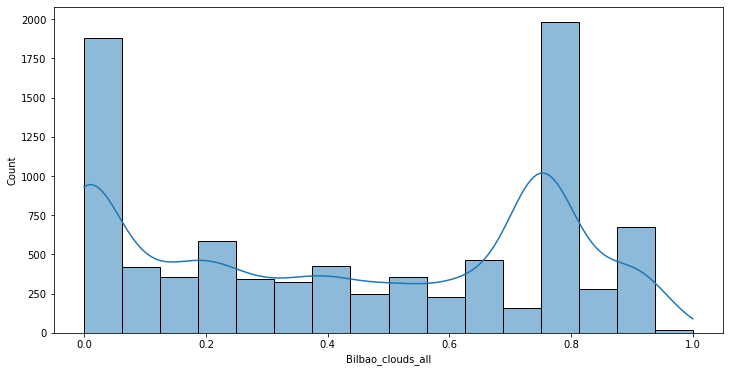

In [165]:
sns.histplot(data = Train_New['Bilbao_clouds_all'], kde = True)

<AxesSubplot:xlabel='Madrid_clouds_all', ylabel='Count'>

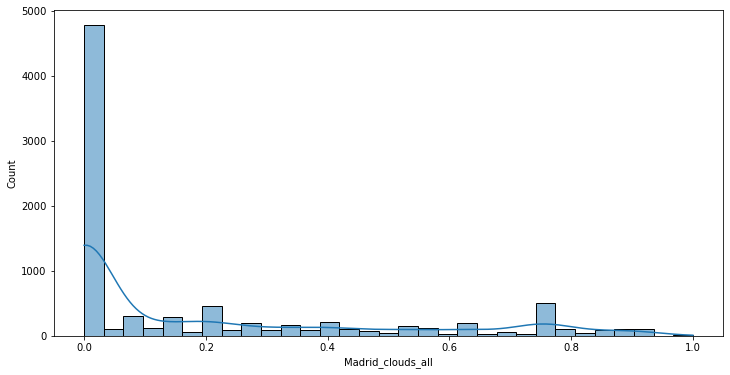

In [166]:
sns.histplot(data = Train_New['Madrid_clouds_all'], kde = True)

<AxesSubplot:xlabel='Seville_clouds_all', ylabel='Count'>

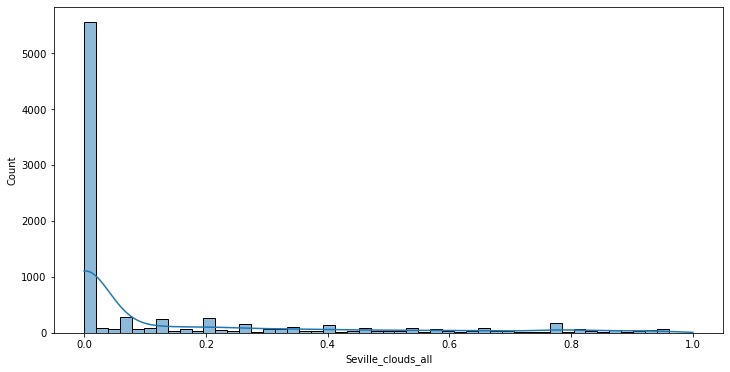

In [167]:
sns.histplot(data = Train_New['Seville_clouds_all'], kde = True)

<AxesSubplot:xlabel='Madrid_humidity', ylabel='Count'>

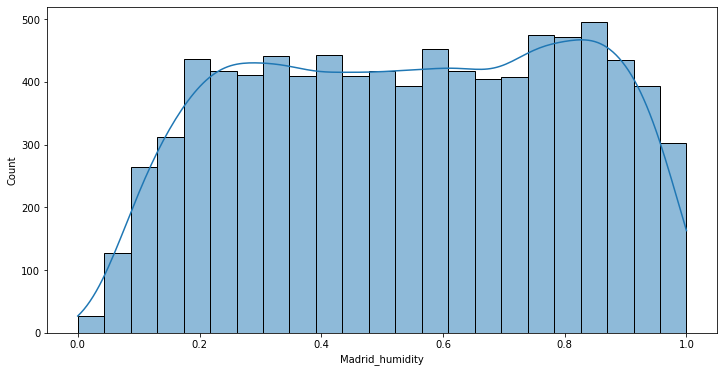

In [168]:
sns.histplot(data = Train_New['Madrid_humidity'], kde = True)

<AxesSubplot:xlabel='Seville_humidity', ylabel='Count'>

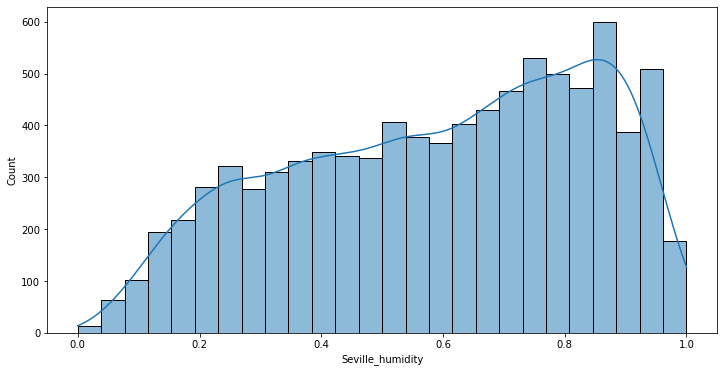

In [169]:
sns.histplot(data = Train_New['Seville_humidity'], kde = True)

<AxesSubplot:xlabel='Bilbao_wind_speed', ylabel='Count'>

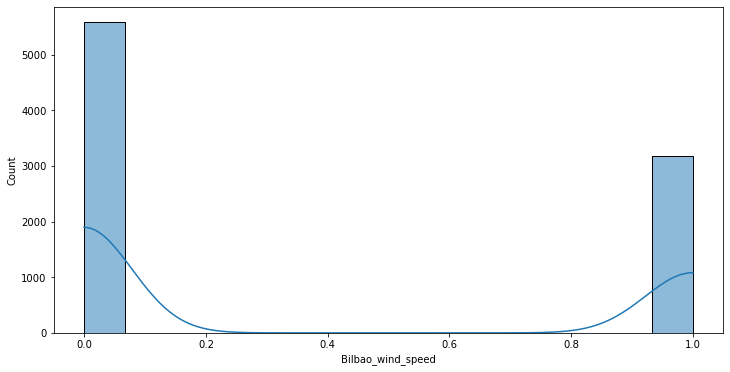

In [170]:
sns.histplot(data = Train_New['Bilbao_wind_speed'], kde = True)

### MULTIVARIATE ANALYSIS

#### HEATMAP PLOT

It can be observed the Humidty - Rain exhibits moderate positive correlation, while Temperature - Temperature exhibit strong positive correlation indicative of multicollinearity 

It can be observed that Humidity - Temperature, Weather id - Rain features exhibit strong negative correlation

It can be observed that Pressure - Temperature, Cloud cover - Temperature exhibit moderate negative correlation

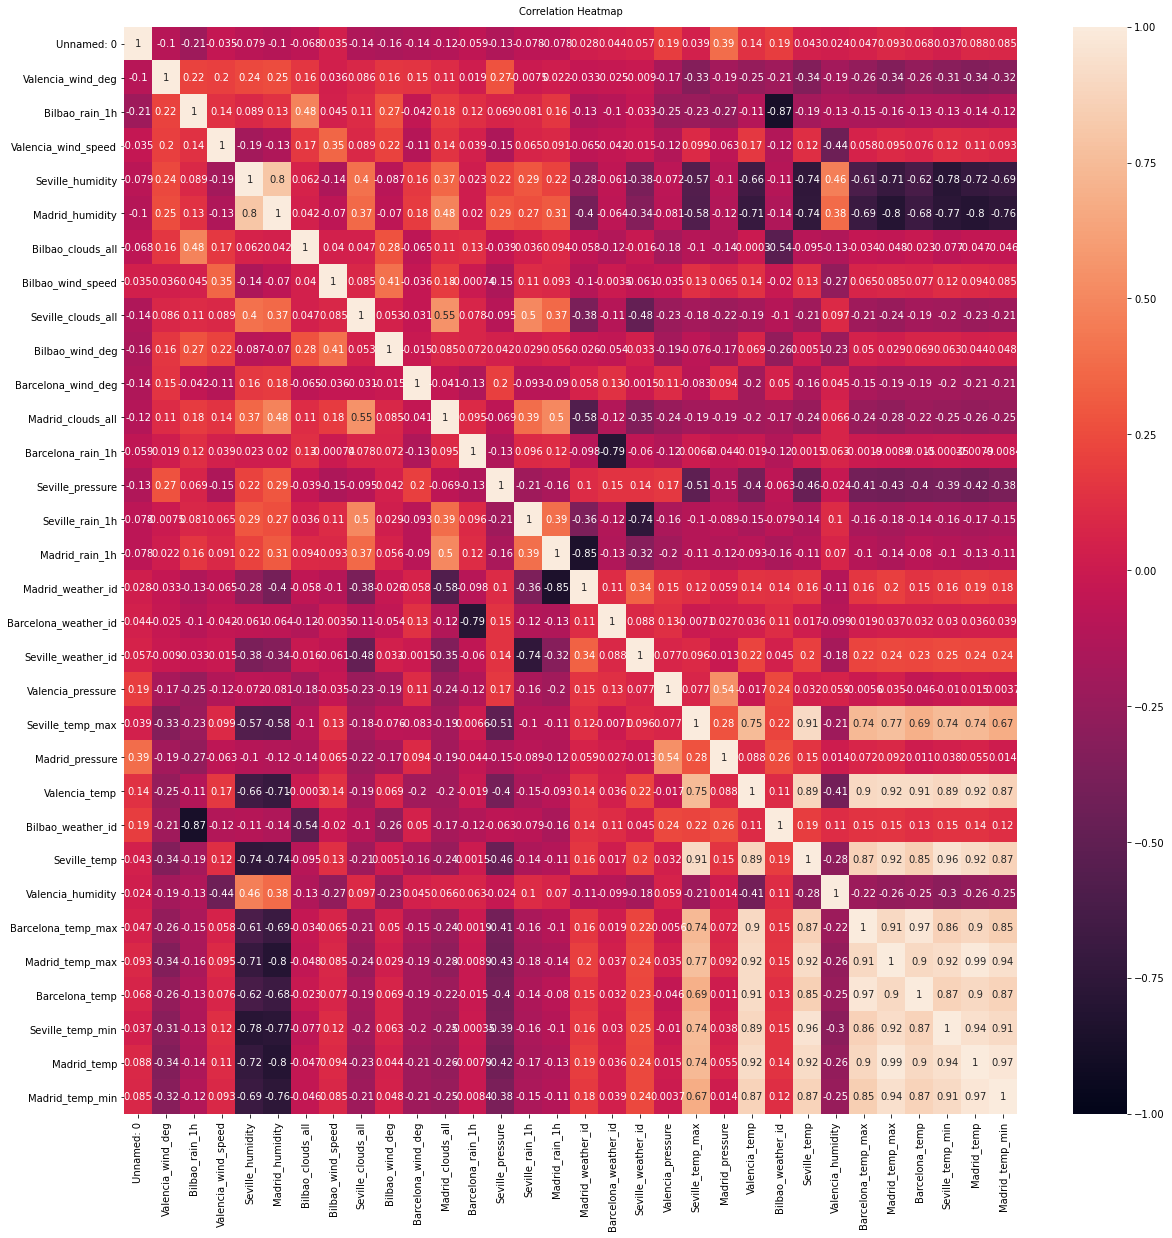

In [180]:
fig, ax = plt.subplots(figsize=(20, 20))
heatmap = sns.heatmap(Train_New.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':10}, pad=12);


#### SCATTER CHARTS

It can be observed that an increase in humidity causes an increase in cloud cover over madrid, however there are instances in madrid where the cloud cover stays constant irrespective of the increase in humidity. This could be attributed to geographic phenomena such as valleys or hills that keep the local humidity constant.

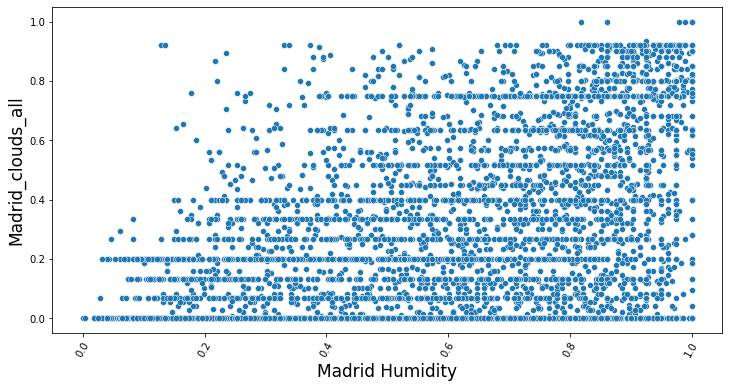

In [195]:
plt.ylabel('Madrid_clouds_all', fontsize = 17)
plt.xlabel('Madrid Humidity', fontsize =17 )
plt.xticks(rotation = 60)
plt.yticks(rotation = 0)
sns.scatterplot(x = 'Madrid_humidity', y = 'Madrid_clouds_all', data = Train_New, ci = None)
plt.show()

It can be observed that there is no direct relation between the weather condition in Barcelona and the wind strength in the region as the wind strength varries across two peaks seasonally.

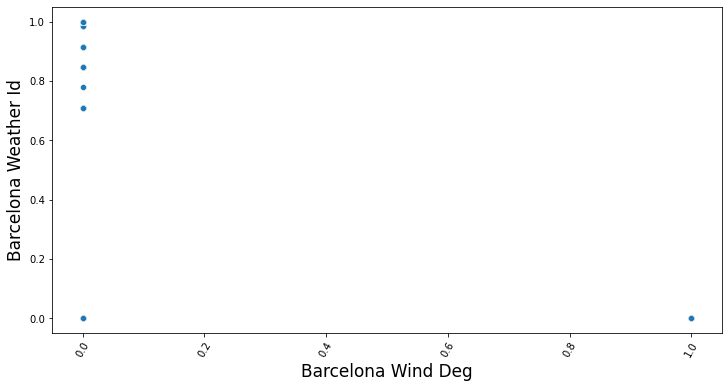

In [226]:
plt.ylabel('Barcelona Weather Id', fontsize = 17)
plt.xlabel('Barcelona Wind Deg', fontsize =17 )
plt.xticks(rotation = 60)
plt.yticks(rotation = 0)
sns.scatterplot(y = 'Barcelona_weather_id', x = 'Barcelona_rain_1h', data = Train_New, ci = None)
plt.show()

#### BAR CHARTS

It can be observed that air pressure within the range of (0.3983 - 0.6793) causes a significant spike in the wind speen while pressures significantly above or below this range result in a near constant wind speed this could be attributed to the presence of geographic phenomena such as hills or valleys that amplify wind speed at that given pressure range. 

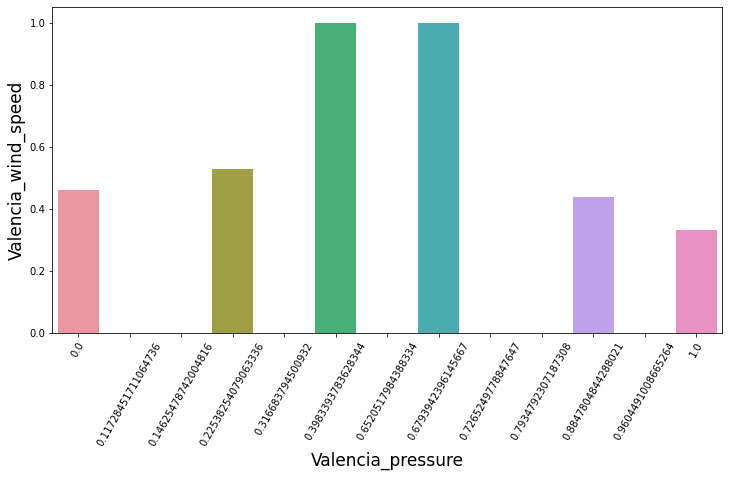

In [228]:
plt.ylabel('Valencia Wind Speed', fontsize = 17)
plt.xlabel('Valencia Pressure', fontsize =17 )
plt.xticks(rotation = 60)
plt.yticks(rotation = 0)
sns.barplot(y = 'Valencia_wind_speed', x = 'Valencia_pressure', data = Train_New, ci = None)
plt.show()

#### LINE PLOTS

It can be observed that for a humidity above 0.6 in Seville the change in the weather condition is exponentially significant

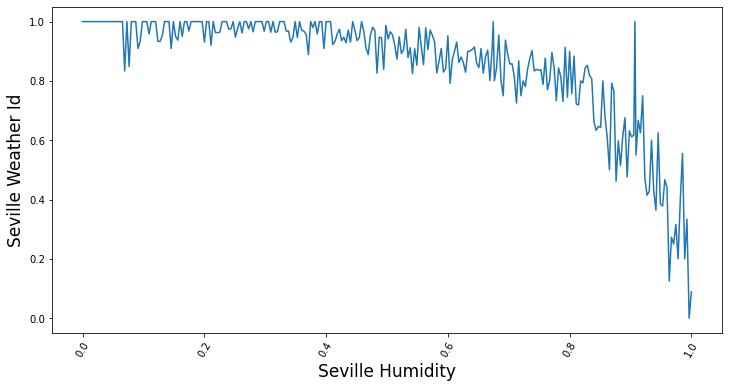

In [213]:
plt.ylabel('Seville Weather Id', fontsize = 17)
plt.xlabel('Seville Humidity', fontsize =17 )
plt.xticks(rotation = 60)
plt.yticks(rotation = 0)
sns.lineplot(y = 'Seville_weather_id', x = 'Seville_humidity', data = Train_New, ci = None)
plt.show()

<a id="eleven"></a>
## 10. Modeling
<a href=#cont>Back to Table of Contents</a>

<a id="twelve"></a>
## 11. Model Performance
<a href=#cont>Back to Table of Contents</a>

<a id="thirteen"></a>
## 12. Model Explanation
<a href=#cont>Back to Table of Contents</a>